In [38]:

import warnings
warnings.simplefilter("ignore")

import pandas as pd 
import numpy as np
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler


from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold, learning_curve, train_test_split, KFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.ensemble import ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold



## Read Dataset 

In [39]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")
train_data

,id,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,credit
0,0,13,40,1,1,2174,0,4,7,9,White,Male,0
1,1,13,13,0,4,0,0,2,6,9,White,Male,0
2,2,9,40,1,6,0,0,0,4,11,White,Male,0
3,3,7,40,0,6,0,0,2,4,1,Black,Male,0
4,4,13,40,5,10,0,0,2,4,9,Black,Female,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,32556,12,38,5,13,0,0,2,4,7,White,Female,0
32557,32557,9,40,0,7,0,0,2,4,11,White,Male,1
32558,32558,9,40,4,1,0,0,6,4,11,White,Female,0
32559,32559,9,20,3,1,0,0,4,4,11,White,Male,0


## Categorical to Numerical 

In [40]:


train_data['F11']=train_data['F11'].map({' Male': 0, ' Female': 1})
train_data['F10'] = train_data['F10'].map({' White':0, ' Black':1, ' Asian-Pac-Islander':2, ' Amer-Indian-Eskimo':3, ' Other':4})


test_data['F11']=test_data['F11'].map({' Male': 0, ' Female': 1})
test_data['F10'] = test_data['F10'].map({' White':0, ' Black':1, ' Asian-Pac-Islander':2, ' Amer-Indian-Eskimo':3, ' Other':4})




## Lets see how is the data destribiution

In [41]:
train_data.credit.value_counts()

0    24720
1     7841
Name: credit, dtype: int64

## data cerreletion

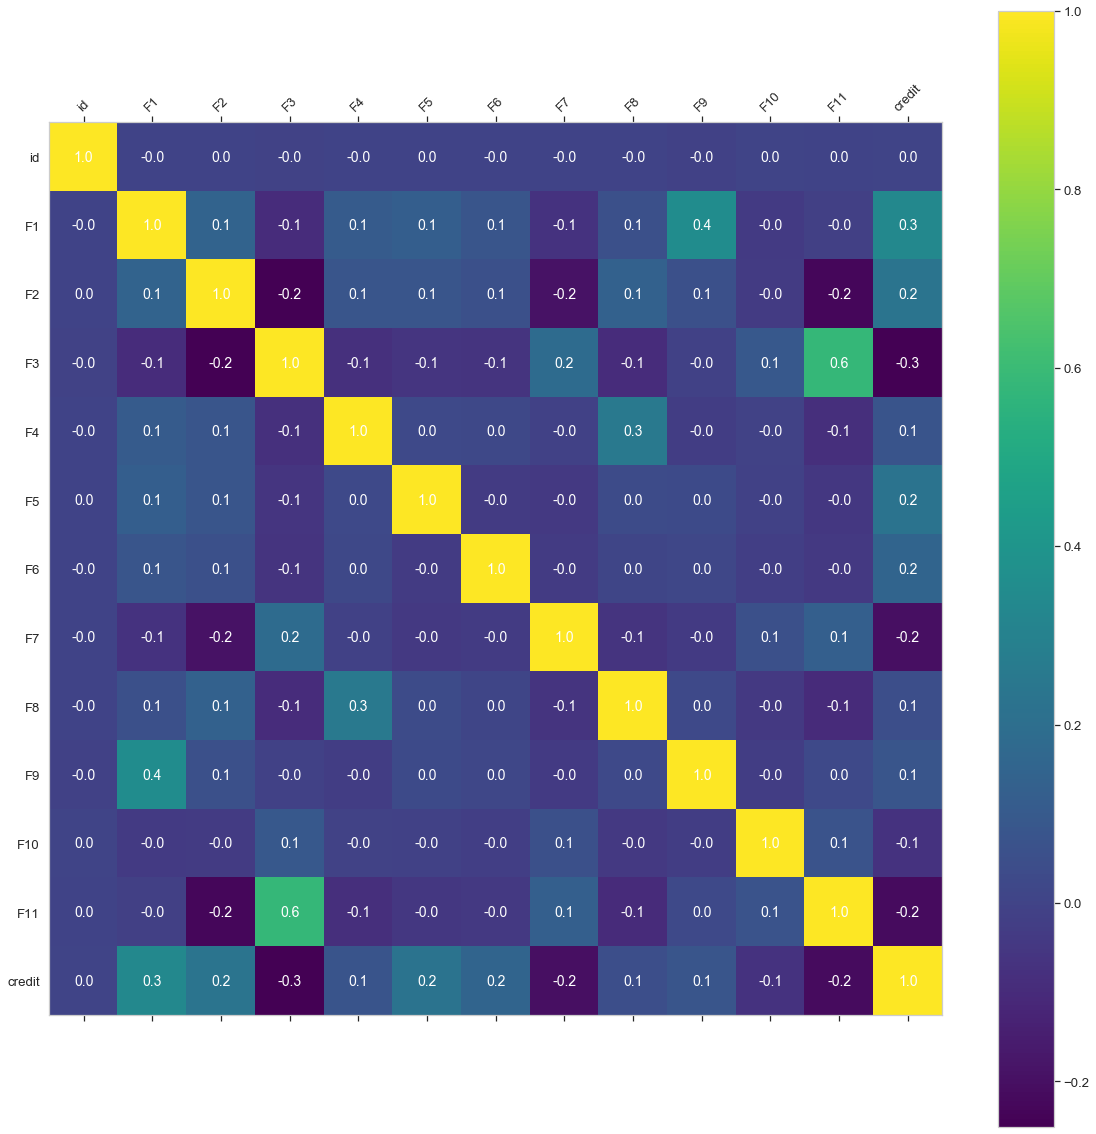

In [42]:
df = train_data

import matplotlib.pyplot as plt

plt.figure(figsize=(20,20)) 
plt.matshow(df.corr(), fignum=1, cmap='viridis')
plt.colorbar()
plt.grid(b=None)
plt.xticks(np.arange(len(df.corr().columns)), df.corr().columns.values, rotation = 45) 
plt.yticks(np.arange(len(df.corr().columns)), df.corr().columns.values) 
for (i, j), corr in np.ndenumerate(df.corr()):
    plt.text(j, i, '{:0.1f}'.format(corr), ha='center', va='center', color='white', fontsize=14)

plt.savefig("corr.eps",format="eps", bbox_inches = 'tight')
plt.show()

# We realized that the Id has nothing to do with the credit risk
## so we can remove the id coloumn

In [43]:
train_data.drop(labels=["id"], axis = 1, inplace = True)
test_data.drop(labels=["id"], axis = 1, inplace = True)

## Lets see what is the F1 relation with respect to credit risk

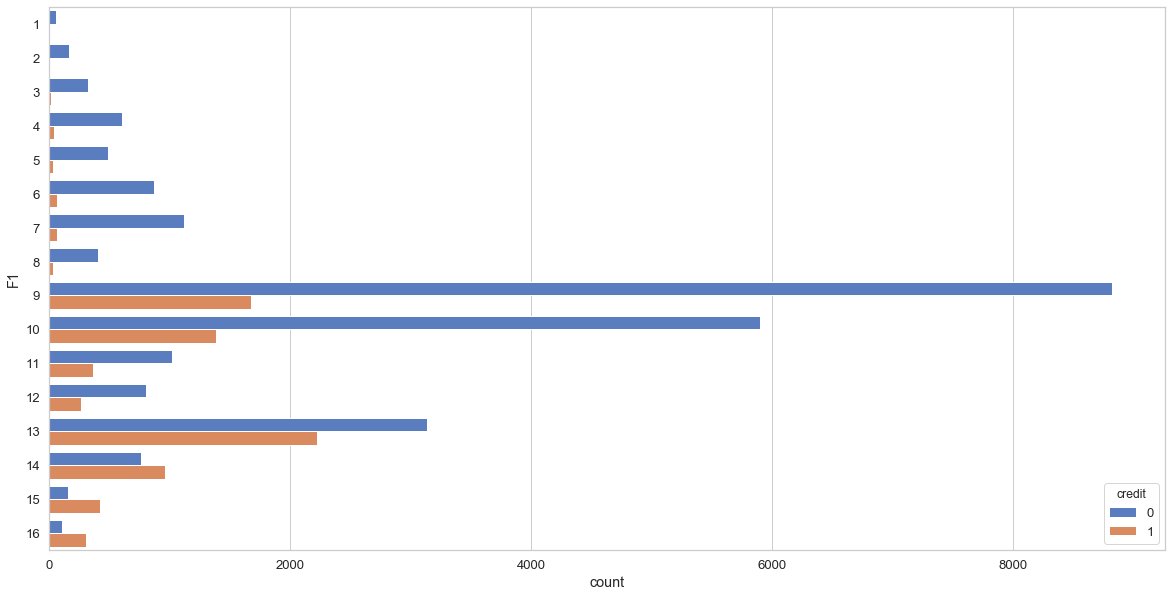

In [48]:
import seaborn as sns
from matplotlib import pyplot
sns.set(style="whitegrid", font_scale=1.2)

a4_dims = (20, 10)
fig, ax = pyplot.subplots(figsize=a4_dims)
g = sns.countplot(y="F1", hue="credit", data=df, palette="muted")
plt.savefig("F1_credit.eps",format="eps", bbox_inches = 'tight')





## Take a look at how the data looks like

In [8]:
train_data

,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,credit
0,13,40,1,1,2174,0,4,7,9,0,0,0
1,13,13,0,4,0,0,2,6,9,0,0,0
2,9,40,1,6,0,0,0,4,11,0,0,0
3,7,40,0,6,0,0,2,4,1,1,0,0
4,13,40,5,10,0,0,2,4,9,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
32556,12,38,5,13,0,0,2,4,7,0,1,0
32557,9,40,0,7,0,0,2,4,11,0,0,1
32558,9,40,4,1,0,0,6,4,11,0,1,0
32559,9,20,3,1,0,0,4,4,11,0,0,0


## Get features and label

In [9]:
array = train_data.values
X = train_data.iloc[:,0:-1]
y = train_data.iloc[:,-1]

## Under sampling 

In [10]:

unique, counts = np.unique(y, return_counts=True)
print("data diversity befor under sampling : ",dict(zip(unique, counts)))

rus = RandomUnderSampler()
X, y = rus.fit_sample(X, y)

unique, counts = np.unique(y, return_counts=True)
print("data diversity after under sampling : ",dict(zip(unique, counts)))


data diversity befor under sampling :  {0: 24720, 1: 7841}
data diversity after under sampling :  {0: 7841, 1: 7841}


## Over sampling(Uncomment to see the results)

In [11]:
# from imblearn.over_sampling import SMOTE
# array = train_data.values
# X = array[:,0:-1]
# y = array[:,-1]


# sm = SMOTE(sampling_strategy='auto', random_state=100)
# X, Y = sm.fit_resample(X, y)
# unique, counts = np.unique(Y, return_counts=True)
# print(dict(zip(unique, counts)))



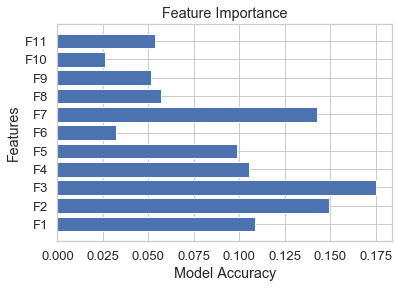

In [12]:

validation_size = 0.20
seed = 7
num_folds = 10

# fit an Extra Tree model to the data
extree = ExtraTreesClassifier()
extree.fit(X, y)

# display the relative importance of each attribute
relval = extree.feature_importances_

# horizontal bar plot of feature importance
pos = np.arange(11) + 0.5
plt.barh(pos, relval, align='center')
plt.title("Feature Importance")
plt.xlabel("Model Accuracy")
plt.ylabel("Features")
plt.yticks(pos, train_data.columns)
plt.grid(True)

## Normalize the data with Standard Scalar 

In [13]:
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(X))

test_data = pd.DataFrame(scaler.transform(test_data))

## Try PCA

In [14]:
# from sklearn.decomposition import PCA
# pca = PCA(n_components=6).fit(np.concatenate((X,test_data)))
# X = pca.transform(X)
# test_data = pca.transform(test_data)


## Feature extraction

In [15]:

model = LogisticRegression(solver='lbfgs')
rfe = RFE(model, 4)
fit = rfe.fit(X, y)
print("Selected Features: %s" % fit.support_)
print("Feature Ranking: %s" % fit.ranking_)



Selected Features: [ True False False False  True False  True False False False  True]
Feature Ranking: [1 2 4 8 1 3 1 7 6 5 1]


In [16]:

params = {'penalty':['l1', 'l2'], 'C':[0.001, 0.01, 0.1],
             'solver':['lbfgs', 'liblinear'], 'l1_ratio':[0.001, 0.01]}

grid = GridSearchCV(LogisticRegression(), param_grid=params, verbose=3)

grid.fit(X, y)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] C=0.001, l1_ratio=0.001, penalty=l1, solver=lbfgs ...............
[CV]  C=0.001, l1_ratio=0.001, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.001, l1_ratio=0.001, penalty=l1, solver=lbfgs ...............
[CV]  C=0.001, l1_ratio=0.001, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.001, l1_ratio=0.001, penalty=l1, solver=lbfgs ...............
[CV]  C=0.001, l1_ratio=0.001, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.001, l1_ratio=0.001, penalty=l1, solver=lbfgs ...............
[CV]  C=0.001, l1_ratio=0.001, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.001, l1_ratio=0.001, penalty=l1, solver=lbfgs ...............
[CV]  C=0.001, l1_ratio=0.001, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.001, l1_ratio=0.001, penalty=l1, solver=liblinear ...........
[CV]  C=0.001, l1_ratio=0.001, penalty=l1, solver=liblinear, score=0.704, total=   0.0s
[CV] C=0.001, 

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s


[CV]  C=0.001, l1_ratio=0.001, penalty=l2, solver=liblinear, score=0.735, total=   0.0s
[CV] C=0.001, l1_ratio=0.001, penalty=l2, solver=liblinear ...........
[CV]  C=0.001, l1_ratio=0.001, penalty=l2, solver=liblinear, score=0.754, total=   0.0s
[CV] C=0.001, l1_ratio=0.001, penalty=l2, solver=liblinear ...........
[CV]  C=0.001, l1_ratio=0.001, penalty=l2, solver=liblinear, score=0.734, total=   0.0s
[CV] C=0.001, l1_ratio=0.001, penalty=l2, solver=liblinear ...........
[CV]  C=0.001, l1_ratio=0.001, penalty=l2, solver=liblinear, score=0.755, total=   0.0s
[CV] C=0.001, l1_ratio=0.001, penalty=l2, solver=liblinear ...........
[CV]  C=0.001, l1_ratio=0.001, penalty=l2, solver=liblinear, score=0.754, total=   0.0s
[CV] C=0.001, l1_ratio=0.01, penalty=l1, solver=lbfgs ................
[CV]  C=0.001, l1_ratio=0.01, penalty=l1, solver=lbfgs, score=nan, total=   0.0s
[CV] C=0.001, l1_ratio=0.01, penalty=l1, solver=lbfgs ................
[CV]  C=0.001, l1_ratio=0.01, penalty=l1, solver=lbfg

[CV]  C=0.01, l1_ratio=0.01, penalty=l1, solver=liblinear, score=0.750, total=   0.0s
[CV] C=0.01, l1_ratio=0.01, penalty=l2, solver=lbfgs .................
[CV]  C=0.01, l1_ratio=0.01, penalty=l2, solver=lbfgs, score=0.741, total=   0.0s
[CV] C=0.01, l1_ratio=0.01, penalty=l2, solver=lbfgs .................
[CV]  C=0.01, l1_ratio=0.01, penalty=l2, solver=lbfgs, score=0.755, total=   0.0s
[CV] C=0.01, l1_ratio=0.01, penalty=l2, solver=lbfgs .................
[CV]  C=0.01, l1_ratio=0.01, penalty=l2, solver=lbfgs, score=0.742, total=   0.0s
[CV] C=0.01, l1_ratio=0.01, penalty=l2, solver=lbfgs .................
[CV]  C=0.01, l1_ratio=0.01, penalty=l2, solver=lbfgs, score=0.758, total=   0.0s
[CV] C=0.01, l1_ratio=0.01, penalty=l2, solver=lbfgs .................
[CV]  C=0.01, l1_ratio=0.01, penalty=l2, solver=lbfgs, score=0.763, total=   0.0s
[CV] C=0.01, l1_ratio=0.01, penalty=l2, solver=liblinear .............
[CV]  C=0.01, l1_ratio=0.01, penalty=l2, solver=liblinear, score=0.741, total=

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:    1.8s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.001, 0.01, 0.1], 'l1_ratio': [0.001, 0.01],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [17]:
grid.best_params_

{'C': 0.01, 'l1_ratio': 0.001, 'penalty': 'l2', 'solver': 'lbfgs'}

In [18]:
grid.best_score_

0.7516265702965917

In [19]:
log_reg = LogisticRegression(**grid.best_params_)

In [20]:

params = {'criterion':['gini'], 'max_depth':[2, 4, 9, 10], 'n_estimators':[300, 400, 500]}

grid = GridSearchCV(RandomForestClassifier(), param_grid=params, verbose=3)

grid.fit(X, y)



Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV] criterion=gini, max_depth=2, n_estimators=300 ...................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  criterion=gini, max_depth=2, n_estimators=300, score=0.768, total=   0.8s
[CV] criterion=gini, max_depth=2, n_estimators=300 ...................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s remaining:    0.0s


[CV]  criterion=gini, max_depth=2, n_estimators=300, score=0.770, total=   0.8s
[CV] criterion=gini, max_depth=2, n_estimators=300 ...................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.6s remaining:    0.0s


[CV]  criterion=gini, max_depth=2, n_estimators=300, score=0.761, total=   0.8s
[CV] criterion=gini, max_depth=2, n_estimators=300 ...................
[CV]  criterion=gini, max_depth=2, n_estimators=300, score=0.773, total=   0.9s
[CV] criterion=gini, max_depth=2, n_estimators=300 ...................
[CV]  criterion=gini, max_depth=2, n_estimators=300, score=0.772, total=   0.8s
[CV] criterion=gini, max_depth=2, n_estimators=400 ...................
[CV]  criterion=gini, max_depth=2, n_estimators=400, score=0.766, total=   1.0s
[CV] criterion=gini, max_depth=2, n_estimators=400 ...................
[CV]  criterion=gini, max_depth=2, n_estimators=400, score=0.769, total=   1.0s
[CV] criterion=gini, max_depth=2, n_estimators=400 ...................
[CV]  criterion=gini, max_depth=2, n_estimators=400, score=0.761, total=   1.1s
[CV] criterion=gini, max_depth=2, n_estimators=400 ...................
[CV]  criterion=gini, max_depth=2, n_estimators=400, score=0.772, total=   1.0s
[CV] criterion

[CV]  criterion=gini, max_depth=10, n_estimators=500, score=0.814, total=   2.6s
[CV] criterion=gini, max_depth=10, n_estimators=500 ..................
[CV]  criterion=gini, max_depth=10, n_estimators=500, score=0.813, total=   2.5s
[CV] criterion=gini, max_depth=10, n_estimators=500 ..................
[CV]  criterion=gini, max_depth=10, n_estimators=500, score=0.821, total=   2.5s


[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:  1.6min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [21]:
grid.best_params_

{'criterion': 'gini', 'max_depth': 10, 'n_estimators': 500}

In [22]:
grid.best_score_

0.817688728344382

In [23]:
rfc = RandomForestClassifier(**grid.best_params_)

In [24]:
param_grid = {'max_depth':[2, 4, 5, 7, 9, 10], 'learning_rate':[0.001, 0.01, 0.1, 0.2, 0.3], 'min_child_weight':[2, 4, 5, 6, 7]}

grid = GridSearchCV(XGBClassifier(), param_grid=param_grid, verbose=3)

grid.fit(X, y)

Fitting 5 folds for each of 150 candidates, totalling 750 fits
[CV] learning_rate=0.001, max_depth=2, min_child_weight=2 ............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.001, max_depth=2, min_child_weight=2, score=0.780, total=   0.2s
[CV] learning_rate=0.001, max_depth=2, min_child_weight=2 ............
[CV]  learning_rate=0.001, max_depth=2, min_child_weight=2, score=0.766, total=   0.2s
[CV] learning_rate=0.001, max_depth=2, min_child_weight=2 ............

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s



[CV]  learning_rate=0.001, max_depth=2, min_child_weight=2, score=0.754, total=   0.2s
[CV] learning_rate=0.001, max_depth=2, min_child_weight=2 ............
[CV]  learning_rate=0.001, max_depth=2, min_child_weight=2, score=0.775, total=   0.2s
[CV] learning_rate=0.001, max_depth=2, min_child_weight=2 ............
[CV]  learning_rate=0.001, max_depth=2, min_child_weight=2, score=0.773, total=   0.2s
[CV] learning_rate=0.001, max_depth=2, min_child_weight=4 ............
[CV]  learning_rate=0.001, max_depth=2, min_child_weight=4, score=0.780, total=   0.2s
[CV] learning_rate=0.001, max_depth=2, min_child_weight=4 ............
[CV]  learning_rate=0.001, max_depth=2, min_child_weight=4, score=0.766, total=   0.2s
[CV] learning_rate=0.001, max_depth=2, min_child_weight=4 ............
[CV]  learning_rate=0.001, max_depth=2, min_child_weight=4, score=0.754, total=   0.2s
[CV] learning_rate=0.001, max_depth=2, min_child_weight=4 ............
[CV]  learning_rate=0.001, max_depth=2, min_child_w

[CV]  learning_rate=0.001, max_depth=5, min_child_weight=2, score=0.809, total=   0.4s
[CV] learning_rate=0.001, max_depth=5, min_child_weight=4 ............
[CV]  learning_rate=0.001, max_depth=5, min_child_weight=4, score=0.806, total=   0.4s
[CV] learning_rate=0.001, max_depth=5, min_child_weight=4 ............
[CV]  learning_rate=0.001, max_depth=5, min_child_weight=4, score=0.805, total=   0.5s
[CV] learning_rate=0.001, max_depth=5, min_child_weight=4 ............
[CV]  learning_rate=0.001, max_depth=5, min_child_weight=4, score=0.809, total=   0.4s
[CV] learning_rate=0.001, max_depth=5, min_child_weight=4 ............
[CV]  learning_rate=0.001, max_depth=5, min_child_weight=4, score=0.799, total=   0.4s
[CV] learning_rate=0.001, max_depth=5, min_child_weight=4 ............
[CV]  learning_rate=0.001, max_depth=5, min_child_weight=4, score=0.807, total=   0.4s
[CV] learning_rate=0.001, max_depth=5, min_child_weight=5 ............
[CV]  learning_rate=0.001, max_depth=5, min_child_we

[CV]  learning_rate=0.001, max_depth=9, min_child_weight=4, score=0.808, total=   0.7s
[CV] learning_rate=0.001, max_depth=9, min_child_weight=4 ............
[CV]  learning_rate=0.001, max_depth=9, min_child_weight=4, score=0.807, total=   0.7s
[CV] learning_rate=0.001, max_depth=9, min_child_weight=4 ............
[CV]  learning_rate=0.001, max_depth=9, min_child_weight=4, score=0.810, total=   0.7s
[CV] learning_rate=0.001, max_depth=9, min_child_weight=4 ............
[CV]  learning_rate=0.001, max_depth=9, min_child_weight=4, score=0.814, total=   0.7s
[CV] learning_rate=0.001, max_depth=9, min_child_weight=5 ............
[CV]  learning_rate=0.001, max_depth=9, min_child_weight=5, score=0.817, total=   0.7s
[CV] learning_rate=0.001, max_depth=9, min_child_weight=5 ............
[CV]  learning_rate=0.001, max_depth=9, min_child_weight=5, score=0.808, total=   0.7s
[CV] learning_rate=0.001, max_depth=9, min_child_weight=5 ............
[CV]  learning_rate=0.001, max_depth=9, min_child_we

[CV]  learning_rate=0.01, max_depth=2, min_child_weight=4, score=0.778, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, min_child_weight=5 .............
[CV]  learning_rate=0.01, max_depth=2, min_child_weight=5, score=0.768, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, min_child_weight=5 .............
[CV]  learning_rate=0.01, max_depth=2, min_child_weight=5, score=0.774, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, min_child_weight=5 .............
[CV]  learning_rate=0.01, max_depth=2, min_child_weight=5, score=0.762, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, min_child_weight=5 .............
[CV]  learning_rate=0.01, max_depth=2, min_child_weight=5, score=0.777, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, min_child_weight=5 .............
[CV]  learning_rate=0.01, max_depth=2, min_child_weight=5, score=0.778, total=   0.2s
[CV] learning_rate=0.01, max_depth=2, min_child_weight=6 .............
[CV]  learning_rate=0.01, max_depth=2, min_child_weight=6,

[CV]  learning_rate=0.01, max_depth=5, min_child_weight=5, score=0.803, total=   0.4s
[CV] learning_rate=0.01, max_depth=5, min_child_weight=5 .............
[CV]  learning_rate=0.01, max_depth=5, min_child_weight=5, score=0.802, total=   0.4s
[CV] learning_rate=0.01, max_depth=5, min_child_weight=5 .............
[CV]  learning_rate=0.01, max_depth=5, min_child_weight=5, score=0.812, total=   0.4s
[CV] learning_rate=0.01, max_depth=5, min_child_weight=6 .............
[CV]  learning_rate=0.01, max_depth=5, min_child_weight=6, score=0.803, total=   0.4s
[CV] learning_rate=0.01, max_depth=5, min_child_weight=6 .............
[CV]  learning_rate=0.01, max_depth=5, min_child_weight=6, score=0.806, total=   0.4s
[CV] learning_rate=0.01, max_depth=5, min_child_weight=6 .............
[CV]  learning_rate=0.01, max_depth=5, min_child_weight=6, score=0.803, total=   0.4s
[CV] learning_rate=0.01, max_depth=5, min_child_weight=6 .............
[CV]  learning_rate=0.01, max_depth=5, min_child_weight=6,

[CV]  learning_rate=0.01, max_depth=9, min_child_weight=6, score=0.814, total=   0.7s
[CV] learning_rate=0.01, max_depth=9, min_child_weight=6 .............
[CV]  learning_rate=0.01, max_depth=9, min_child_weight=6, score=0.807, total=   0.7s
[CV] learning_rate=0.01, max_depth=9, min_child_weight=6 .............
[CV]  learning_rate=0.01, max_depth=9, min_child_weight=6, score=0.807, total=   0.7s
[CV] learning_rate=0.01, max_depth=9, min_child_weight=6 .............
[CV]  learning_rate=0.01, max_depth=9, min_child_weight=6, score=0.810, total=   0.7s
[CV] learning_rate=0.01, max_depth=9, min_child_weight=6 .............
[CV]  learning_rate=0.01, max_depth=9, min_child_weight=6, score=0.815, total=   0.7s
[CV] learning_rate=0.01, max_depth=9, min_child_weight=7 .............
[CV]  learning_rate=0.01, max_depth=9, min_child_weight=7, score=0.815, total=   0.7s
[CV] learning_rate=0.01, max_depth=9, min_child_weight=7 .............
[CV]  learning_rate=0.01, max_depth=9, min_child_weight=7,

[CV]  learning_rate=0.1, max_depth=2, min_child_weight=6, score=0.820, total=   0.2s
[CV] learning_rate=0.1, max_depth=2, min_child_weight=7 ..............
[CV]  learning_rate=0.1, max_depth=2, min_child_weight=7, score=0.823, total=   0.2s
[CV] learning_rate=0.1, max_depth=2, min_child_weight=7 ..............
[CV]  learning_rate=0.1, max_depth=2, min_child_weight=7, score=0.811, total=   0.2s
[CV] learning_rate=0.1, max_depth=2, min_child_weight=7 ..............
[CV]  learning_rate=0.1, max_depth=2, min_child_weight=7, score=0.818, total=   0.2s
[CV] learning_rate=0.1, max_depth=2, min_child_weight=7 ..............
[CV]  learning_rate=0.1, max_depth=2, min_child_weight=7, score=0.816, total=   0.2s
[CV] learning_rate=0.1, max_depth=2, min_child_weight=7 ..............
[CV]  learning_rate=0.1, max_depth=2, min_child_weight=7, score=0.823, total=   0.2s
[CV] learning_rate=0.1, max_depth=4, min_child_weight=2 ..............
[CV]  learning_rate=0.1, max_depth=4, min_child_weight=2, score=

[CV]  learning_rate=0.1, max_depth=5, min_child_weight=7, score=0.829, total=   0.4s
[CV] learning_rate=0.1, max_depth=5, min_child_weight=7 ..............
[CV]  learning_rate=0.1, max_depth=5, min_child_weight=7, score=0.829, total=   0.4s
[CV] learning_rate=0.1, max_depth=5, min_child_weight=7 ..............
[CV]  learning_rate=0.1, max_depth=5, min_child_weight=7, score=0.836, total=   0.4s
[CV] learning_rate=0.1, max_depth=7, min_child_weight=2 ..............
[CV]  learning_rate=0.1, max_depth=7, min_child_weight=2, score=0.832, total=   0.6s
[CV] learning_rate=0.1, max_depth=7, min_child_weight=2 ..............
[CV]  learning_rate=0.1, max_depth=7, min_child_weight=2, score=0.830, total=   0.6s
[CV] learning_rate=0.1, max_depth=7, min_child_weight=2 ..............
[CV]  learning_rate=0.1, max_depth=7, min_child_weight=2, score=0.835, total=   0.6s
[CV] learning_rate=0.1, max_depth=7, min_child_weight=2 ..............
[CV]  learning_rate=0.1, max_depth=7, min_child_weight=2, score=

[CV]  learning_rate=0.1, max_depth=10, min_child_weight=2, score=0.830, total=   0.8s
[CV] learning_rate=0.1, max_depth=10, min_child_weight=2 .............
[CV]  learning_rate=0.1, max_depth=10, min_child_weight=2, score=0.824, total=   0.8s
[CV] learning_rate=0.1, max_depth=10, min_child_weight=2 .............
[CV]  learning_rate=0.1, max_depth=10, min_child_weight=2, score=0.829, total=   0.8s
[CV] learning_rate=0.1, max_depth=10, min_child_weight=2 .............
[CV]  learning_rate=0.1, max_depth=10, min_child_weight=2, score=0.828, total=   0.8s
[CV] learning_rate=0.1, max_depth=10, min_child_weight=2 .............
[CV]  learning_rate=0.1, max_depth=10, min_child_weight=2, score=0.834, total=   0.8s
[CV] learning_rate=0.1, max_depth=10, min_child_weight=4 .............
[CV]  learning_rate=0.1, max_depth=10, min_child_weight=4, score=0.828, total=   0.8s
[CV] learning_rate=0.1, max_depth=10, min_child_weight=4 .............
[CV]  learning_rate=0.1, max_depth=10, min_child_weight=4,

[CV]  learning_rate=0.2, max_depth=4, min_child_weight=2, score=0.833, total=   0.3s
[CV] learning_rate=0.2, max_depth=4, min_child_weight=2 ..............
[CV]  learning_rate=0.2, max_depth=4, min_child_weight=2, score=0.835, total=   0.3s
[CV] learning_rate=0.2, max_depth=4, min_child_weight=4 ..............
[CV]  learning_rate=0.2, max_depth=4, min_child_weight=4, score=0.832, total=   0.3s
[CV] learning_rate=0.2, max_depth=4, min_child_weight=4 ..............
[CV]  learning_rate=0.2, max_depth=4, min_child_weight=4, score=0.832, total=   0.4s
[CV] learning_rate=0.2, max_depth=4, min_child_weight=4 ..............
[CV]  learning_rate=0.2, max_depth=4, min_child_weight=4, score=0.838, total=   0.3s
[CV] learning_rate=0.2, max_depth=4, min_child_weight=4 ..............
[CV]  learning_rate=0.2, max_depth=4, min_child_weight=4, score=0.832, total=   0.4s
[CV] learning_rate=0.2, max_depth=4, min_child_weight=4 ..............
[CV]  learning_rate=0.2, max_depth=4, min_child_weight=4, score=

[CV]  learning_rate=0.2, max_depth=7, min_child_weight=4, score=0.830, total=   0.5s
[CV] learning_rate=0.2, max_depth=7, min_child_weight=4 ..............
[CV]  learning_rate=0.2, max_depth=7, min_child_weight=4, score=0.836, total=   0.5s
[CV] learning_rate=0.2, max_depth=7, min_child_weight=4 ..............
[CV]  learning_rate=0.2, max_depth=7, min_child_weight=4, score=0.833, total=   0.5s
[CV] learning_rate=0.2, max_depth=7, min_child_weight=4 ..............
[CV]  learning_rate=0.2, max_depth=7, min_child_weight=4, score=0.835, total=   0.5s
[CV] learning_rate=0.2, max_depth=7, min_child_weight=5 ..............
[CV]  learning_rate=0.2, max_depth=7, min_child_weight=5, score=0.828, total=   0.5s
[CV] learning_rate=0.2, max_depth=7, min_child_weight=5 ..............
[CV]  learning_rate=0.2, max_depth=7, min_child_weight=5, score=0.833, total=   0.5s
[CV] learning_rate=0.2, max_depth=7, min_child_weight=5 ..............
[CV]  learning_rate=0.2, max_depth=7, min_child_weight=5, score=

[CV]  learning_rate=0.2, max_depth=10, min_child_weight=4, score=0.835, total=   0.7s
[CV] learning_rate=0.2, max_depth=10, min_child_weight=5 .............
[CV]  learning_rate=0.2, max_depth=10, min_child_weight=5, score=0.826, total=   0.7s
[CV] learning_rate=0.2, max_depth=10, min_child_weight=5 .............
[CV]  learning_rate=0.2, max_depth=10, min_child_weight=5, score=0.826, total=   0.7s
[CV] learning_rate=0.2, max_depth=10, min_child_weight=5 .............
[CV]  learning_rate=0.2, max_depth=10, min_child_weight=5, score=0.828, total=   0.7s
[CV] learning_rate=0.2, max_depth=10, min_child_weight=5 .............
[CV]  learning_rate=0.2, max_depth=10, min_child_weight=5, score=0.827, total=   0.7s
[CV] learning_rate=0.2, max_depth=10, min_child_weight=5 .............
[CV]  learning_rate=0.2, max_depth=10, min_child_weight=5, score=0.837, total=   0.7s
[CV] learning_rate=0.2, max_depth=10, min_child_weight=6 .............
[CV]  learning_rate=0.2, max_depth=10, min_child_weight=6,

[CV]  learning_rate=0.3, max_depth=4, min_child_weight=5, score=0.837, total=   0.3s
[CV] learning_rate=0.3, max_depth=4, min_child_weight=5 ..............
[CV]  learning_rate=0.3, max_depth=4, min_child_weight=5, score=0.833, total=   0.3s
[CV] learning_rate=0.3, max_depth=4, min_child_weight=5 ..............
[CV]  learning_rate=0.3, max_depth=4, min_child_weight=5, score=0.838, total=   0.3s
[CV] learning_rate=0.3, max_depth=4, min_child_weight=6 ..............
[CV]  learning_rate=0.3, max_depth=4, min_child_weight=6, score=0.831, total=   0.3s
[CV] learning_rate=0.3, max_depth=4, min_child_weight=6 ..............
[CV]  learning_rate=0.3, max_depth=4, min_child_weight=6, score=0.834, total=   0.3s
[CV] learning_rate=0.3, max_depth=4, min_child_weight=6 ..............
[CV]  learning_rate=0.3, max_depth=4, min_child_weight=6, score=0.836, total=   0.3s
[CV] learning_rate=0.3, max_depth=4, min_child_weight=6 ..............
[CV]  learning_rate=0.3, max_depth=4, min_child_weight=6, score=

[CV]  learning_rate=0.3, max_depth=7, min_child_weight=6, score=0.829, total=   0.5s
[CV] learning_rate=0.3, max_depth=7, min_child_weight=6 ..............
[CV]  learning_rate=0.3, max_depth=7, min_child_weight=6, score=0.830, total=   0.5s
[CV] learning_rate=0.3, max_depth=7, min_child_weight=6 ..............
[CV]  learning_rate=0.3, max_depth=7, min_child_weight=6, score=0.830, total=   0.5s
[CV] learning_rate=0.3, max_depth=7, min_child_weight=6 ..............
[CV]  learning_rate=0.3, max_depth=7, min_child_weight=6, score=0.832, total=   0.5s
[CV] learning_rate=0.3, max_depth=7, min_child_weight=6 ..............
[CV]  learning_rate=0.3, max_depth=7, min_child_weight=6, score=0.836, total=   0.5s
[CV] learning_rate=0.3, max_depth=7, min_child_weight=7 ..............
[CV]  learning_rate=0.3, max_depth=7, min_child_weight=7, score=0.828, total=   0.5s
[CV] learning_rate=0.3, max_depth=7, min_child_weight=7 ..............
[CV]  learning_rate=0.3, max_depth=7, min_child_weight=7, score=

[CV]  learning_rate=0.3, max_depth=10, min_child_weight=6, score=0.831, total=   1.0s
[CV] learning_rate=0.3, max_depth=10, min_child_weight=6 .............
[CV]  learning_rate=0.3, max_depth=10, min_child_weight=6, score=0.834, total=   1.0s
[CV] learning_rate=0.3, max_depth=10, min_child_weight=7 .............
[CV]  learning_rate=0.3, max_depth=10, min_child_weight=7, score=0.824, total=   1.0s
[CV] learning_rate=0.3, max_depth=10, min_child_weight=7 .............
[CV]  learning_rate=0.3, max_depth=10, min_child_weight=7, score=0.826, total=   1.0s
[CV] learning_rate=0.3, max_depth=10, min_child_weight=7 .............
[CV]  learning_rate=0.3, max_depth=10, min_child_weight=7, score=0.827, total=   1.0s
[CV] learning_rate=0.3, max_depth=10, min_child_weight=7 .............
[CV]  learning_rate=0.3, max_depth=10, min_child_weight=7, score=0.827, total=   1.0s
[CV] learning_rate=0.3, max_depth=10, min_child_weight=7 .............
[CV]  learning_rate=0.3, max_depth=10, min_child_weight=7,

[Parallel(n_jobs=1)]: Done 750 out of 750 | elapsed:  6.2min finished


GridSearchCV(cv=None, error_score=nan,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_es...
                                     random_state=None, reg_alpha=None,
                                     reg_lambda=None, scale_pos_weight=None,
                                     subsample=None, tree_method=None,
                                     validate_parameters=None, 

In [25]:
grid.best_params_

{'learning_rate': 0.2, 'max_depth': 4, 'min_child_weight': 6}

In [26]:
grid.best_score_

0.8346512046801507

In [27]:
xgb = XGBClassifier(**grid.best_params_)

In [28]:
svm = svm.SVC(C= 10, gamma='scale',kernel='rbf')

In [29]:
mlp = MLPClassifier(hidden_layer_sizes=(40,10,5,3),max_iter=500)

In [31]:

from sklearn.metrics import accuracy_score
y = pd.DataFrame(y.reshape(-1,1))

classifiers = [log_reg, rfc, xgb, svm, mlp]

folds = StratifiedKFold(n_splits=4, shuffle=True, random_state=11)

scores_dict = {}

for train_index, valid_index in folds.split(X, y):
    
    X_train_fold, X_valid_fold = X.iloc[train_index], X.iloc[valid_index]
    y_train_fold, y_valid_fold = y.iloc[train_index], y.iloc[valid_index]

    for classifier in classifiers:
        
        name = classifier.__class__.__name__
        classifier.fit(X_train_fold, y_train_fold)
        training_predictions = classifier.predict(X_valid_fold)
        
        scores = accuracy_score(y_valid_fold, training_predictions)
        scores_dict[name] = scores

# Taking average of the scores
for classifier in scores_dict:
    scores_dict[classifier] = scores_dict[classifier]/folds.n_splits



## Take a look at the results too choose the best classifier

In [32]:
scores_dict

{'LogisticRegression': 0.7520087882610972,
 'RandomForestClassifier': 0.8174977910538179,
 'XGBClassifier': 0.8343327201613929,
 'SVC': 0.8057645652000064,
 'MLPClassifier': 0.8054462446987852}

## Predict the test data with the best model

In [33]:
y_pred = xgb.predict(test_data)
#Save the model output in a text file\n
with open('output.txt', mode='wt', encoding='utf-8') as myfile:
    myfile.write('\n'.join(str(results) for results in y_pred))


